In [1]:
#@Author: Zhuowen Li
#@LastEdit: 2021/8/23 下午1:53:15
#@Version: 
#@Description: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

import cooltools 
import cooler
import cooltools.lib.plotting
from matplotlib.colors import LogNorm

#font setting
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 40

In [ ]:
hic_file = '/public/home/lizw/task/pore_c/DpnII_hic2/4DN_cool/MAPQ_1_1000.mcool::resolutions/50000'
run04_file = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run04_TAIR10_unphased.matrix.mcool::resolutions/50000'
run01_rep1 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run01_TAIR10_unphased.matrix.mcool::resolutions/50000'
run03_rep2 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run03_TAIR10_unphased.matrix.mcool::resolutions/50000'
run06_rep2 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run06_TAIR10_unphased.matrix.mcool::resolutions/50000'
run07_rep1 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run07_TAIR10_unphased.matrix.mcool::resolutions/50000'
run08_file = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run08_TAIR10_unphased.matrix.mcool::resolutions/50000'
run02_chiapore = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/matrix/zb_DpnII_run02_TAIR10_unphased.matrix.mcool::resolutions/50000'

lowhic_rep1 = '/public/home/lizw/task/pore_c/lowinputHIC/rep1/MAPQ_1_1000.mcool::resolutions/50000'
lowhic_rep2 = '/public/home/lizw/task/pore_c/lowinputHIC/rep2/MAPQ_1_1000.mcool::resolutions/50000'
lowhic_rep3 = '/public/home/lizw/task/pore_c/lowinputHIC/rep3/MAPQ_1_1000.mcool::resolutions/50000'

lowhic_b1 = '/public/home/lizw/task/pore_c/lowinputHIC/B1/MAPQ_1_1000.mcool::resolutions/50000'
lowhic_b20 = '/public/home/lizw/task/pore_c/lowinputHIC/B20/MAPQ_1_1000.mcool::resolutions/50000'
lowhic_b16 = '/public/home/lizw/task/pore_c/lowinputHIC/B16/MAPQ_1_1000.mcool::resolutions/50000'
lowhic_b15 = '/public/home/lizw/task/pore_c/lowinputHIC/B15/MAPQ_1_1000.mcool::resolutions/50000'
lowhic_b79 = '/public/home/lizw/task/pore_c/lowinputHIC/B79/MAPQ_1_1000.mcool::resolutions/50000'

region = ('3',0,5000000)

# 单独画一种

# to plot ticks in terms of megabases we use the EngFormatter
# https://matplotlib.org/gallery/api/engineering_formatter.html

# LogNorm
# Since C data has a high dynamic range, we often plot the data in log-scale. 
# This enables simultaneous visualization of features near and far from the diagonal in a consistent colorscale.
# Note that regions with no reported counts are evident as white stripes at both centromeres. 
# This occurs because reads are not uniquely mapped to these highly-repetitive regions. These regions are masked before matrix balancing.

In [3]:
def draw_contact_different_reso(coolerfile,region,prefix):
    import cooltools 
    import cooler
    import cooltools.lib.plotting
    from matplotlib.colors import LogNorm

    #font setting
    import matplotlib.font_manager as font_manager
    font_dirs = ["/public/home/lizw/software/font"]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 40
    clr_50k = cooler.Cooler(f'{coolerfile}::resolutions/50000')
    norm = LogNorm(vmax=50_000)
    chromstarts = []
    for i in clr_50k.chromnames:
        print(f'{i} : {clr_50k.extent(i)}')
        chromstarts.append(clr_50k.extent(i)[0])

    from matplotlib.ticker import EngFormatter
    bp_formatter = EngFormatter('b')

    def format_ticks(ax, x=True, y=True, rotate=True):
        if y:
            ax.yaxis.set_major_formatter(bp_formatter)
        if x:
            ax.xaxis.set_major_formatter(bp_formatter)
            ax.xaxis.tick_bottom()
        if rotate:
            ax.tick_params(axis='x',rotation=45)

    f, axs = plt.subplots(
        figsize=(35,10),
        ncols=3)
    
    ax = axs[0]
    im = ax.matshow(clr_50k.matrix(balance=True)[:], vmax=0.001,cmap='fall',norm = norm);
    plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='');
    ax.set_xticks(chromstarts)
    ax.set_xticklabels(clr_50k.chromnames)
    ax.set_yticks(chromstarts)
    ax.set_yticklabels(clr_50k.chromnames)
    ax.xaxis.tick_bottom()
    ax.set_title('All chromosomes')

    clr_5k = cooler.Cooler(f'{coolerfile}::resolutions/5000')
    ax = axs[1]
    im = ax.matshow(
        clr_5k.matrix(balance=True).fetch(region[0]),
        vmax=0.01,
        cmap='fall',
        norm = norm,
        extent=(0,clr_5k.chromsizes[region[0]], clr_5k.chromsizes[region[0]], 0)
    );
    plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='');
    ax.set_title(f'chr{region[0]}')
    ax.set_ylabel('position, Mb')
    format_ticks(ax)

    clr_1k = cooler.Cooler(f'{coolerfile}::resolutions/1000')
    ax = axs[2]
    im = ax.matshow(
        clr_1k.matrix(balance=True).fetch(region),
        vmax=0.5,
        cmap='fall',
        norm = norm,
        extent=(region[1], region[2], region[2], region[1])
    );
    chrom = region[0]
    ax.set_title(f'chr{chrom}:{region[1]:,}-{region[2]:,}')
    plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='');
    format_ticks(ax)
    plt.tight_layout()
    plt.savefig(f'{prefix}_coolmatrix_visualization.png',dpi=300,format='png',bbox_inches = 'tight')

In [3]:
draw_contact('/public/home/lizw/task/pore_c/DpnII_hic2/4DN_cool/MAPQ_1_1000.mcool',region,'/public/home/lizw/task/pore_c/compare/visulization/hic_new')
draw_contact(hic_file,region,'/public/home/lizw/task/pore_c/compare/visulization/hic')
draw_contact(run04_file,region,'/public/home/lizw/task/pore_c/compare/visulization/porec')
draw_contact(run01_rep1,region,'/public/home/lizw/task/pore_c/compare/visulization/porec_run01_rep1')
draw_contact(run03_rep2,region,'/public/home/lizw/task/pore_c/compare/visulization/porec_run03_rep2')
draw_contact(run02_chiapore,region,'/public/home/lizw/task/pore_c/compare/visulization/run02_chiapore')

#rep1
draw_contact(run07_rep1,region,'/public/home/lizw/task/pore_c/compare/visulization/porec_run07_rep1')

#rep2
draw_contact(run06_rep2,region,'/public/home/lizw/task/pore_c/compare/visulization/porec_run06_rep2')
draw_contact(run08_file,region,'/public/home/lizw/task/pore_c/compare/visulization/porec_run08')
draw_contact(lowhic_b79,region,'/public/home/lizw/task/pore_c/lowinputHIC/B79/B79')

# 画两种在上下三角在一起比较

# 多种order 

In [1]:
order2 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.2/DpnII_run04.order_2_1000.mcool::resolutions/50000'
order3 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.2/DpnII_run04.order_3_1000.mcool::resolutions/50000'
order4to5 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.2/DpnII_run04.order_4-5_1000.mcool::resolutions/50000'
order6to10 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.2/DpnII_run04.order_6-10_1000.mcool::resolutions/50000'
order11to20 = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.2/DpnII_run04.order_11-20_1000.mcool::resolutions/50000'
order20more = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.2/DpnII_run04.order_20+_1000.mcool::resolutions/50000'

In [5]:
region

('3', 0, 5000000)

1 : (0, 609)
2 : (609, 1003)
3 : (1003, 1473)
4 : (1473, 1845)
5 : (1845, 2385)


<ipython-input-4-8e254446df99>:35: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(clr.matrix(balance=True)[:], vmax=0.001,cmap='fall',norm = norm);
<ipython-input-4-8e254446df99>:45: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(
<ipython-input-4-8e254446df99>:58: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(


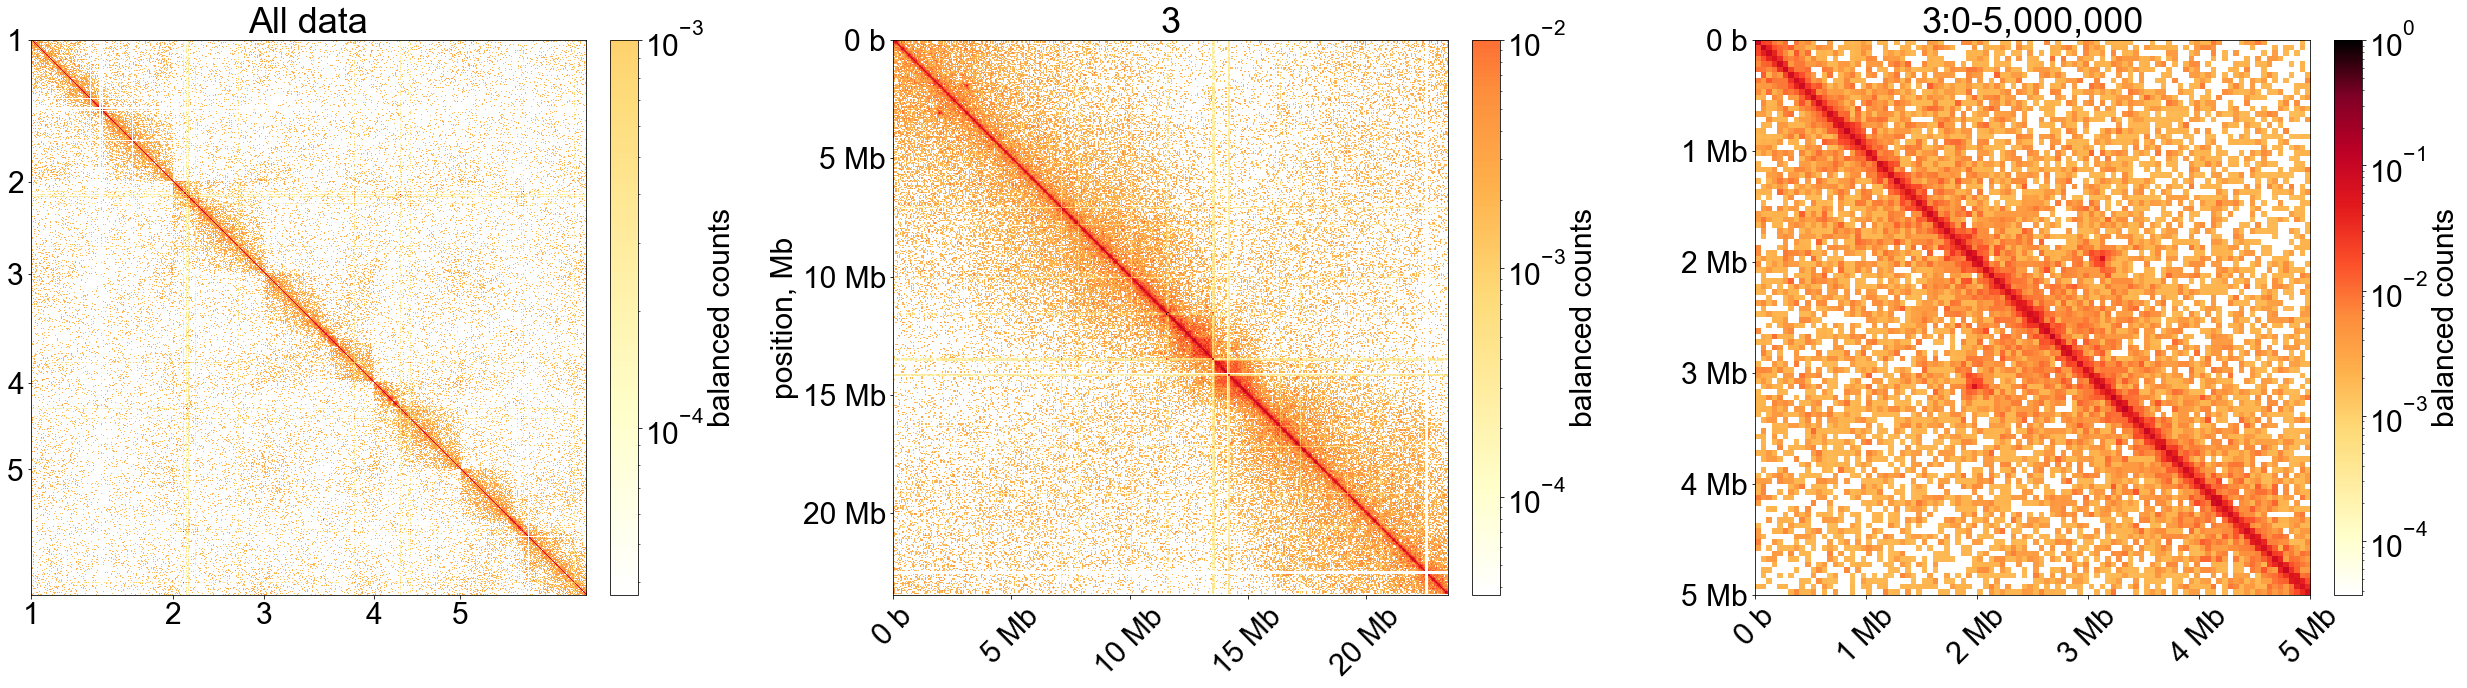

In [9]:
draw_contact(order2,region,'/public/home/lizw/task/pore_c/compare/DpnII_run04.order_2')

1 : (0, 609)
2 : (609, 1003)
3 : (1003, 1473)
4 : (1473, 1845)
5 : (1845, 2385)


<ipython-input-4-8e254446df99>:35: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(clr.matrix(balance=True)[:], vmax=0.001,cmap='fall',norm = norm);
<ipython-input-4-8e254446df99>:45: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(
<ipython-input-4-8e254446df99>:58: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(


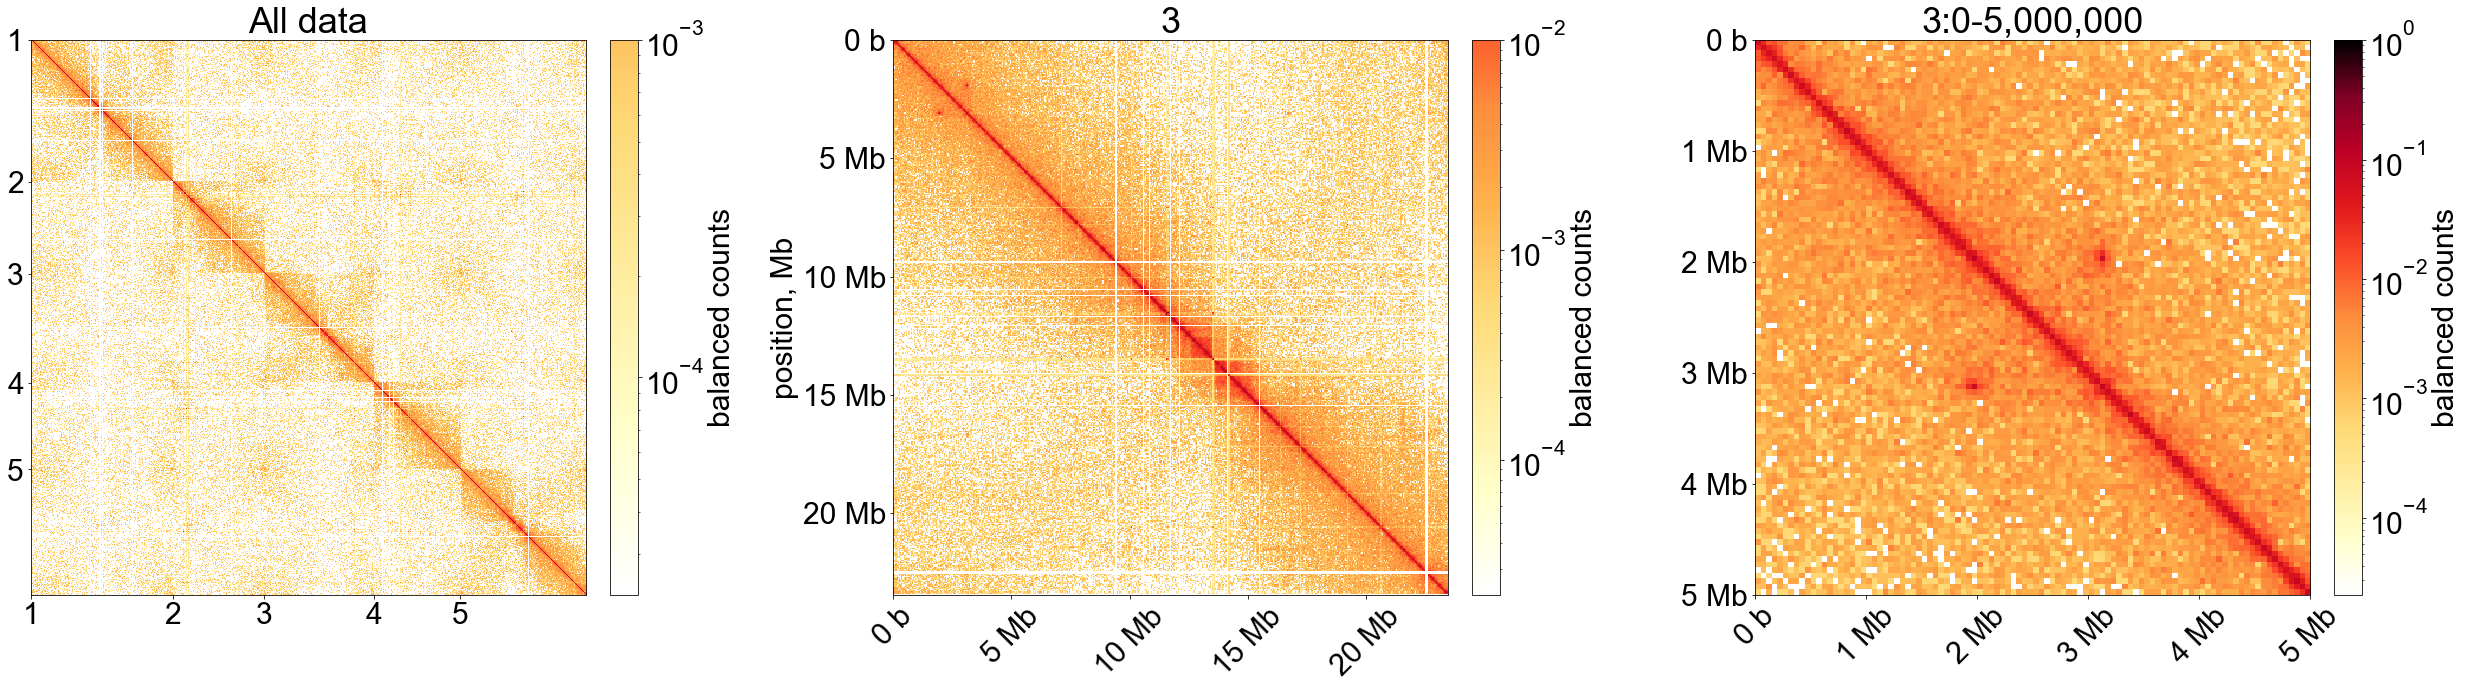

In [10]:
draw_contact(order3,region,'/public/home/lizw/task/pore_c/compare/DpnII_run04.order_3')

1 : (0, 609)
2 : (609, 1003)
3 : (1003, 1473)
4 : (1473, 1845)
5 : (1845, 2385)


<ipython-input-4-8e254446df99>:35: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(clr.matrix(balance=True)[:], vmax=0.001,cmap='fall',norm = norm);
<ipython-input-4-8e254446df99>:45: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(
<ipython-input-4-8e254446df99>:58: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(


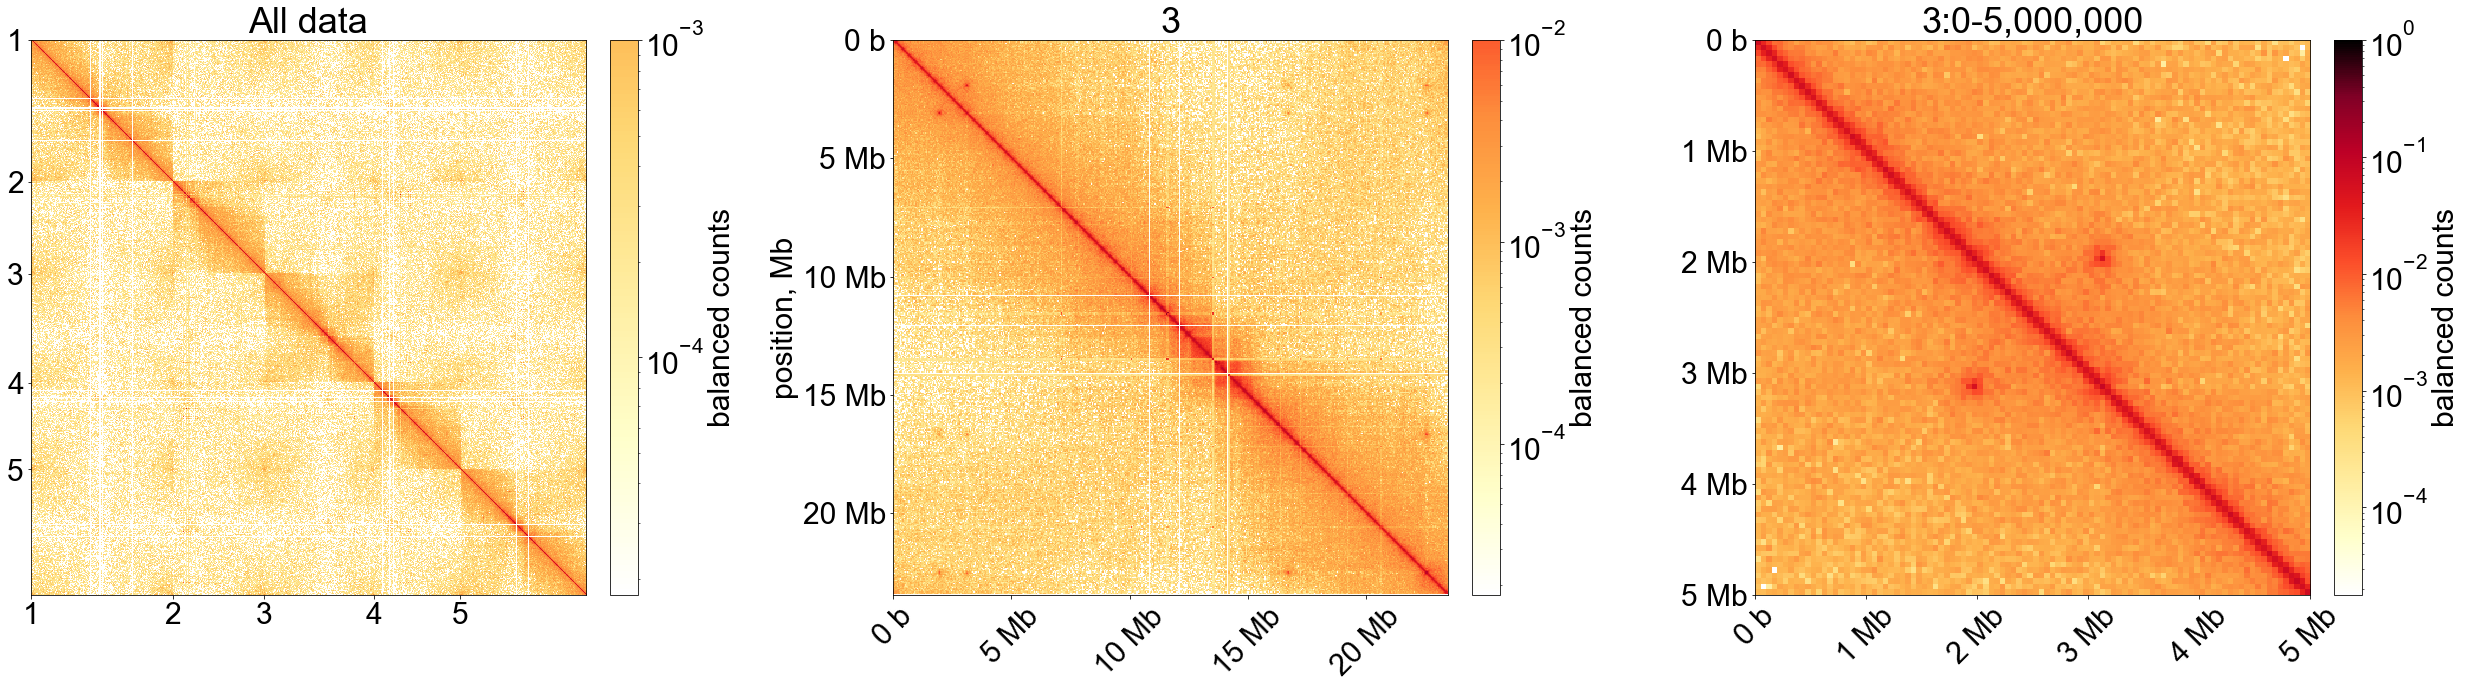

In [11]:
draw_contact(order4to5,region,'/public/home/lizw/task/pore_c/compare/DpnII_run04.order_4-5')

1 : (0, 609)
2 : (609, 1003)
3 : (1003, 1473)
4 : (1473, 1845)
5 : (1845, 2385)


<ipython-input-4-8e254446df99>:35: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(clr.matrix(balance=True)[:], vmax=0.001,cmap='fall',norm = norm);
<ipython-input-4-8e254446df99>:45: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(
<ipython-input-4-8e254446df99>:58: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(


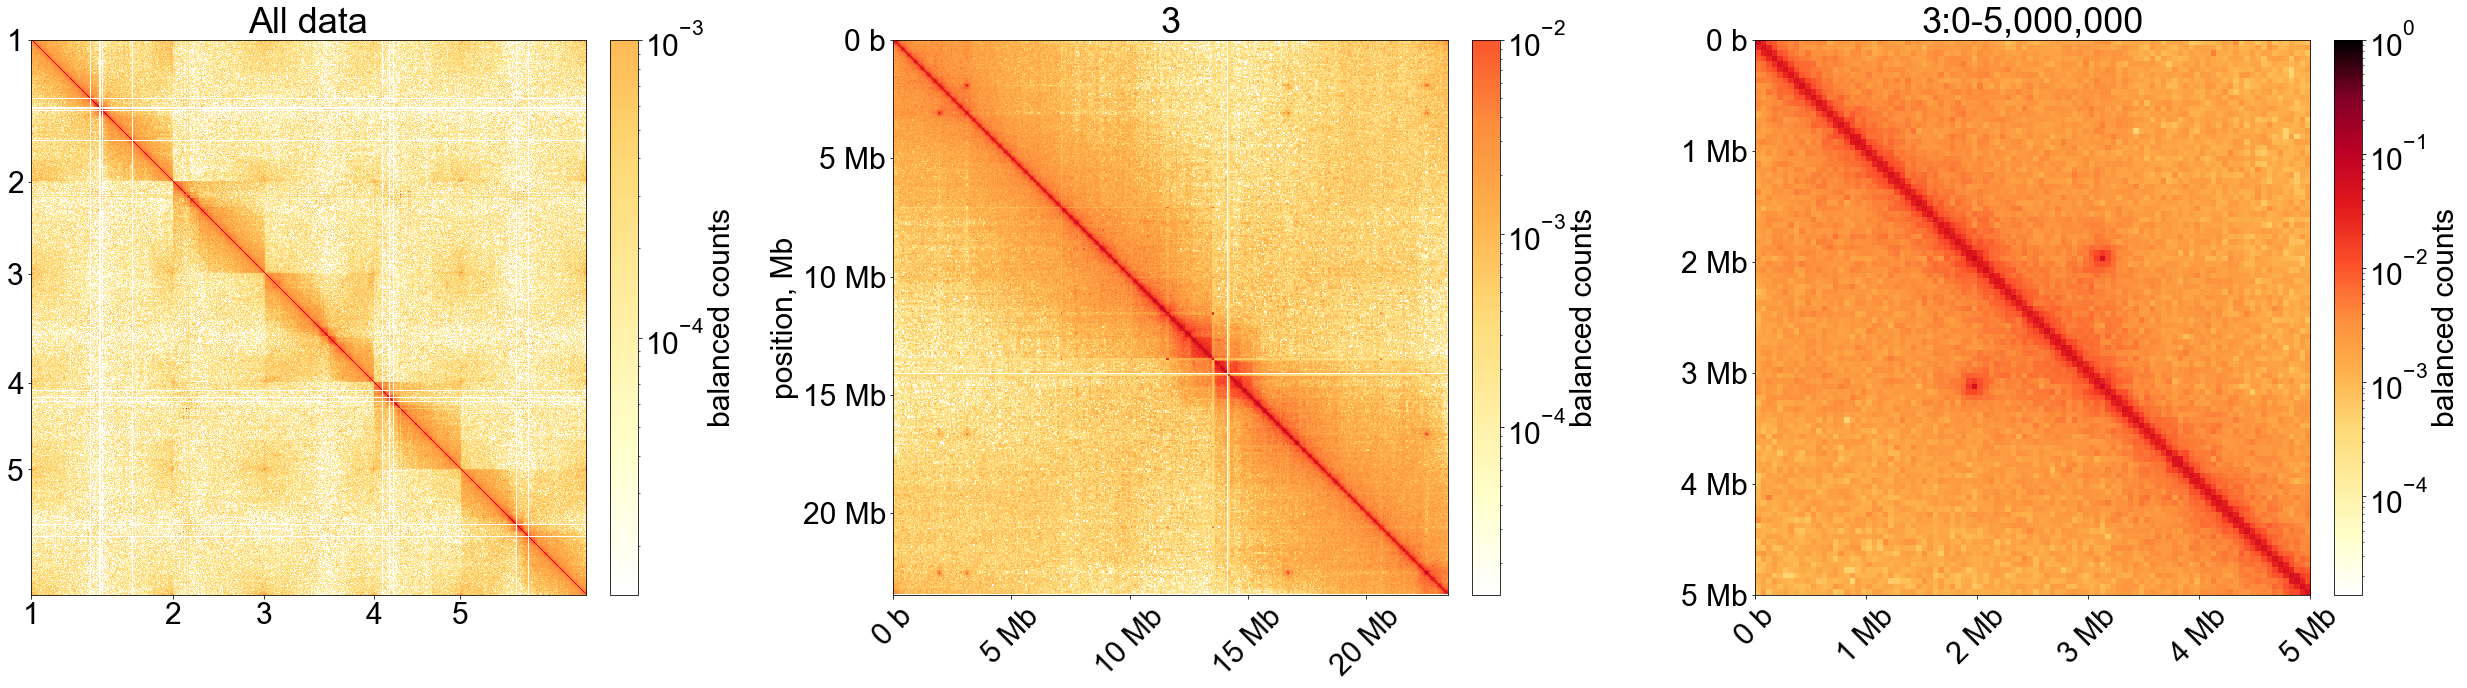

In [12]:
draw_contact(order6to10,region,'/public/home/lizw/task/pore_c/compare/DpnII_run04.order_6-10')

1 : (0, 609)
2 : (609, 1003)
3 : (1003, 1473)
4 : (1473, 1845)
5 : (1845, 2385)


<ipython-input-4-8e254446df99>:35: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(clr.matrix(balance=True)[:], vmax=0.001,cmap='fall',norm = norm);
<ipython-input-4-8e254446df99>:45: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(
<ipython-input-4-8e254446df99>:58: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(


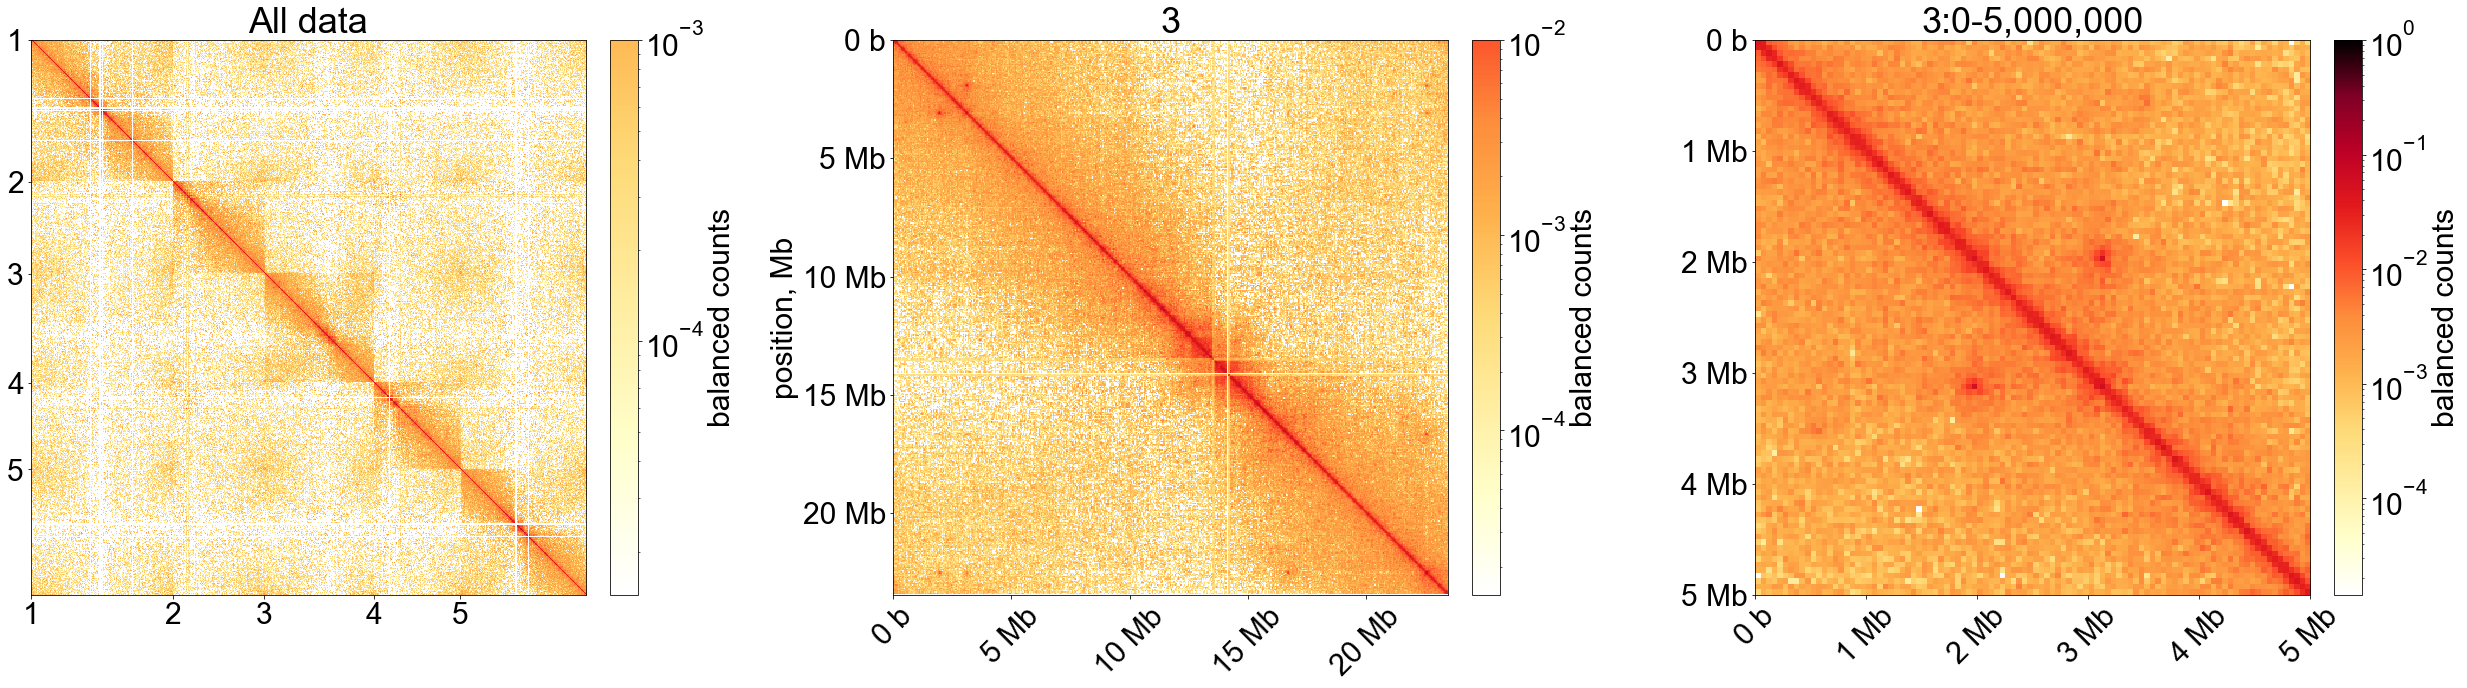

In [13]:
draw_contact(order11to20,region,'/public/home/lizw/task/pore_c/compare/DpnII_run04.order_11-20')

1 : (0, 609)
2 : (609, 1003)
3 : (1003, 1473)
4 : (1473, 1845)
5 : (1845, 2385)


<ipython-input-4-8e254446df99>:35: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(clr.matrix(balance=True)[:], vmax=0.001,cmap='fall',norm = norm);
<ipython-input-4-8e254446df99>:45: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(
<ipython-input-4-8e254446df99>:58: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(


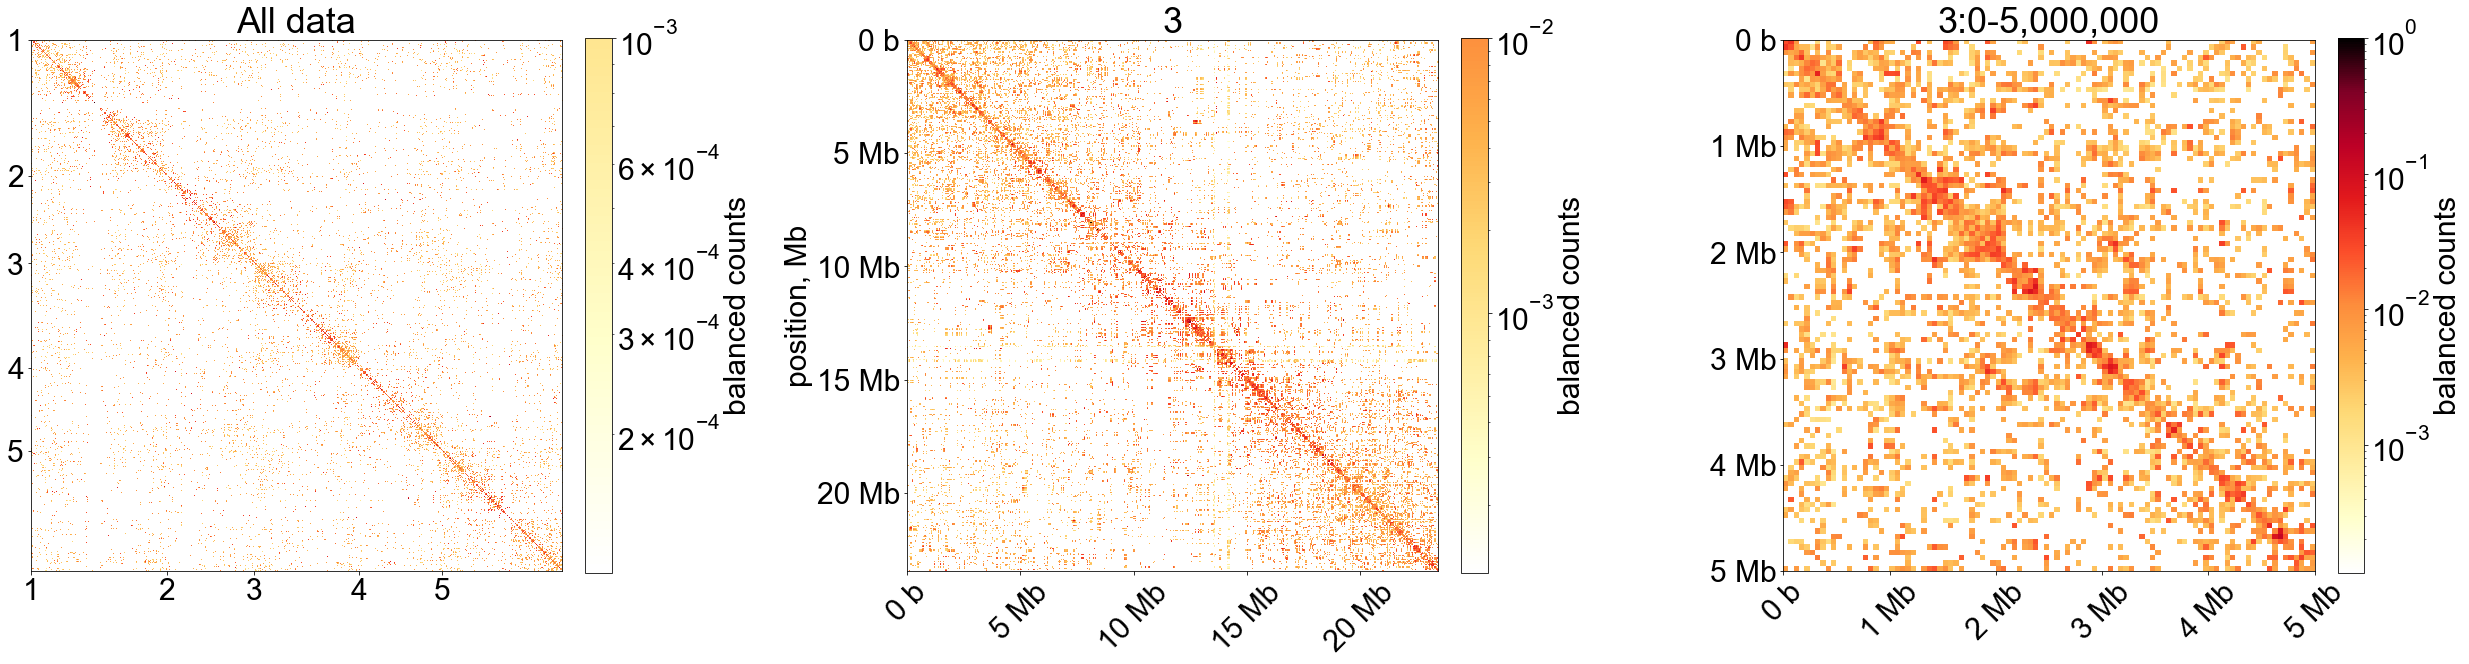

In [14]:
draw_contact(order20more,region,'/public/home/lizw/task/pore_c/compare/DpnII_run04.order_20+')

1 : (0, 609)
2 : (609, 1003)
3 : (1003, 1473)
4 : (1473, 1845)
5 : (1845, 2385)


<ipython-input-15-bfdb0ee5ee10>:42: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(matrix_a_merge, vmax=0.001,cmap='fall',norm = norm);
<ipython-input-15-bfdb0ee5ee10>:63: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(
<ipython-input-15-bfdb0ee5ee10>:87: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.matshow(


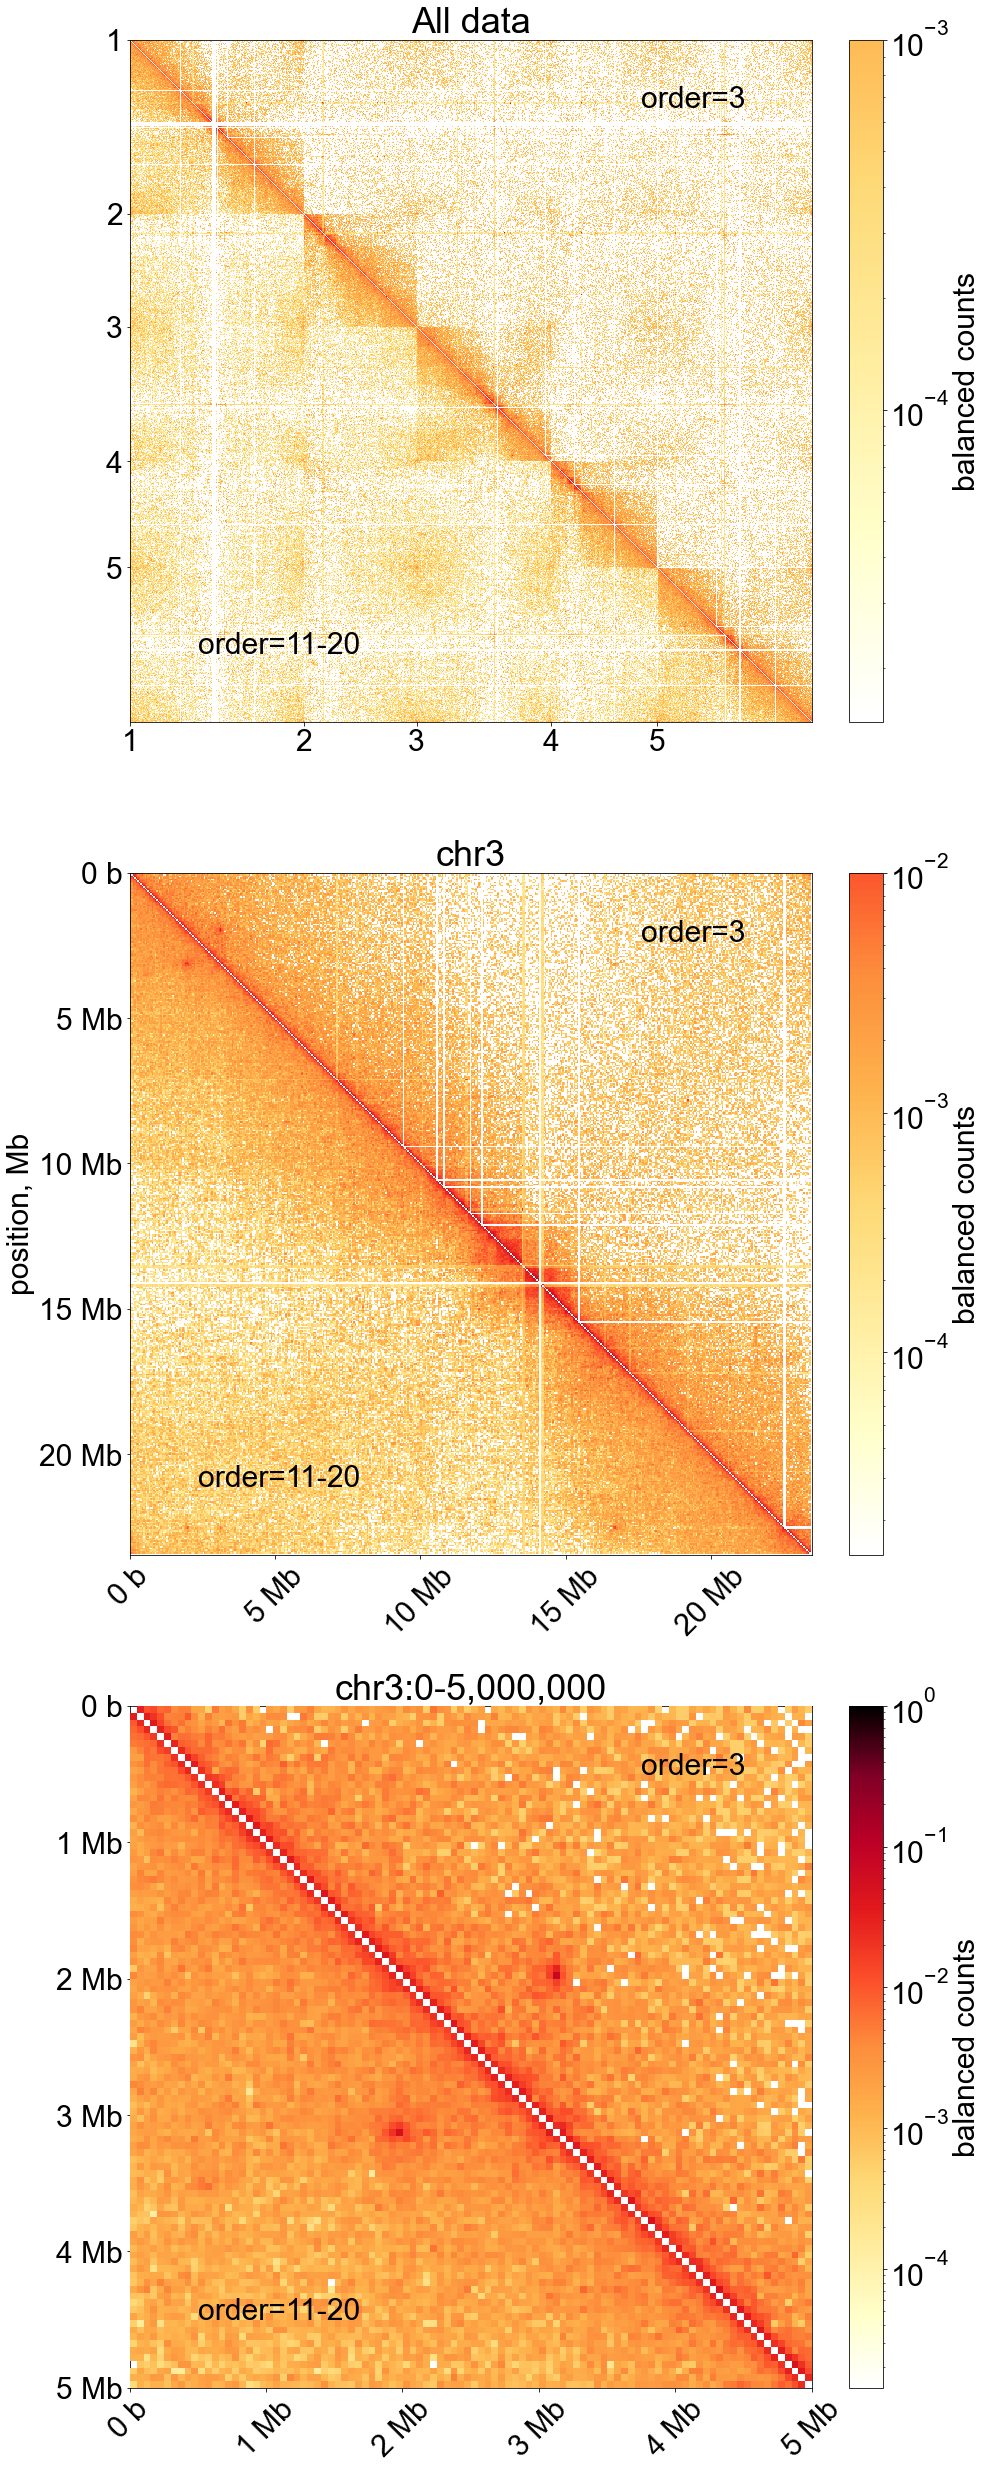

In [32]:
draw_divide_re(order3,order11to20,region,'/public/home/lizw/task/pore_c/compare/','order=3','order=11-20')